Rotten Tomatoes is a popular movie rating website. The dataset used in this project is from rotten tomatoes, and contains the top 100 movies of all time. It describes the rating(in %) and number of reviews for each movie. The review(in %) is the percentage of approved Tomatometer Critics who have given the movies a positive review. There is also the audience score(in %) for each movie in the movie page. This metric is not included in the top 100 list and would be extracted from the website through web scraping. Would'nt it be cool to compare the credit scores and the audience scores to see which movie is trully the best? 

'Roger Ebert' is another movie review website. Most people like Roger Ebert because it explains movie in such a way that they would know whether they would like it or not. Wouldn't it be good if we have a word cloud for each of the movie in that top 100 list with the Roger Ebert review text in that  word cloud for each movie? Having a word cloud for each movie would give us a snapshot of what makes each movie great.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import os
import requests
import wptools

In [2]:
movie_data = pd.read_csv('bestofrt.tsv', sep = "\t")

In [3]:
movie_data

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370
...,...,...,...,...
95,96,100,Man on Wire (2008),156
96,97,97,Jaws (1975),74
97,98,100,Toy Story (1995),78
98,99,97,"The Godfather, Part II (1974)",72


In [4]:
# let's grap the audience score from the website by webscraping

In [5]:
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html)) as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_ = 'audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_ = 'audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',', '') 
        df_list.append({'title': title, 'audience_score':int(audience_score), 'num_audience_ratings':int(num_audience_ratings)})
        
df = pd.DataFrame(df_list, columns = ['title', 'audience_score', 'num_audience_ratings'])

In [6]:
df

,title,audience_score,num_audience_ratings
0,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,The 39 Steps (1935),86,23647
2,The Adventures of Robin Hood (1938),89,33584
3,All About Eve (1950),94,44564
4,All Quiet on the Western Front (1930),89,17768
...,...,...,...
95,Up (2009),90,1201878
96,Vertigo (1958),93,101454
97,The Wages of Fear (1953),95,8536
98,Wonder Woman (2017),90,112955


In [7]:
#Now, let's join both tables and analyze the movies using both audience scores and their ratings.

In [8]:
df.sort_values(by = 'title', ignore_index = True, inplace = True)
movie_data.sort_values(by = 'title', ignore_index = True, inplace = True)

In [9]:
df = df.rename(columns = {'title':'Title'})

In [10]:
merged_data = pd.concat([movie_data, df], axis = 1, join = 'inner')

In [11]:
merged_data.head(2)

,ranking,critic_score,title,number_of_critic_ratings,Title,audience_score,num_audience_ratings
0,53,100,12 Angry Men (Twelve Angry Men) (1957),49,12 Angry Men (Twelve Angry Men) (1957),97,103672
1,29,96,12 Years a Slave (2013),316,12 Years a Slave (2013),90,138789


In [12]:
merged_data = merged_data.drop('Title', axis = 1)

In [13]:
merged_data.head(2)

,ranking,critic_score,title,number_of_critic_ratings,audience_score,num_audience_ratings
0,53,100,12 Angry Men (Twelve Angry Men) (1957),49,97,103672
1,29,96,12 Years a Slave (2013),316,90,138789


In [72]:
merged_data.to_csv("movie_score.csv")

In [14]:
# Let's explore movies with High rating and high audience score

merged_data[(merged_data['critic_score'] >= merged_data['critic_score'].median()) & (merged_data['audience_score'] >= merged_data['audience_score'].median())][['title','critic_score', 'audience_score' ]].sort_values('audience_score', ascending = False, ignore_index = True)

,title,critic_score,audience_score
0,12 Angry Men (Twelve Angry Men) (1957),100,97
1,The Godfather (1972),99,97
2,Seven Samurai (Shichinin no Samurai) (1956),100,97
3,Sunset Boulevard (1950),98,95
4,Rear Window (1954),100,95
5,The Wages of Fear (1953),100,95
6,The Battle of Algiers (La Battaglia di Algeri)...,99,95
7,Metropolis (1927),99,95
8,Moonlight (2016),98,95
9,Singin' in the Rain (1952),100,95


In [15]:
# Those are the movies with high critic and audience scores

In [16]:
# Now, let's get to the Roger Ebert reviews for the movies in our dataset

#We are going to use the Python's request library to gather the review texts for the movies.

In [17]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

In [18]:
# We will first make a directory where our text will be stored
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

    

In [19]:
# Let's check the contents of the folder

os.listdir(folder_name)

['1-the-wizard-of-oz-1939-film.txt',
 '10-metropolis-1927-film.txt',
 '100-battleship-potemkin.txt',
 '11-e.t.-the-extra-terrestrial.txt',
 '12-modern-times-film.txt',
 '14-singin-in-the-rain.txt',
 '15-boyhood-film.txt',
 '16-casablanca-film.txt',
 '17-moonlight-2016-film.txt',
 '18-psycho-1960-film.txt',
 '19-laura-1944-film.txt',
 '2-citizen-kane.txt',
 '20-nosferatu.txt',
 '21-snow-white-and-the-seven-dwarfs-1937-film.txt',
 '22-a-hard-day27s-night-film.txt',
 '23-la-grande-illusion.txt',
 '25-the-battle-of-algiers.txt',
 '26-dunkirk-2017-film.txt',
 '27-the-maltese-falcon-1941-film.txt',
 '29-12-years-a-slave-film.txt',
 '3-the-third-man.txt',
 '30-gravity-2013-film.txt',
 '31-sunset-boulevard-film.txt',
 '32-king-kong-1933-film.txt',
 '33-spotlight-film.txt',
 '34-the-adventures-of-robin-hood.txt',
 '35-rashomon.txt',
 '36-rear-window.txt',
 '37-selma-film.txt',
 '38-taxi-driver.txt',
 '39-toy-story-3.txt',
 '4-get-out-film.txt',
 '40-argo-2012-film.txt',
 '41-toy-story-2.txt',
 

In [20]:
len(os.listdir(folder_name))

88

In [21]:
#There are 12 files, this is because 12 movies from the top 100 do not have reviews in the Roger Ebert website

In [22]:
#Opening and Reading From the text files we just saved

#To store data from multiple files in a pandas DataFrame we'll need a loop to iterate through the files and open and read each of them.

#We've used the listdir method from the OS library so far in this project and that is helpful when we want to open every file in the folder.

#Now, we will use the glob library which allows for Unix-style pathname pattern expansion, by using glob patterns to specify sets of filenames using wildcard characters, like * that can be used to match a string of any length.

In [23]:
import glob

In [24]:
# We want all file names that end with ".txt", which in the ebert review folder, it's all of them

In [25]:
# The code below looks through the ebert_reviews folder and print all files that end in .txt

In [26]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    print(ebert_review)

ebert_reviews\1-the-wizard-of-oz-1939-film.txt
ebert_reviews\10-metropolis-1927-film.txt
ebert_reviews\100-battleship-potemkin.txt
ebert_reviews\11-e.t.-the-extra-terrestrial.txt
ebert_reviews\12-modern-times-film.txt
ebert_reviews\14-singin-in-the-rain.txt
ebert_reviews\15-boyhood-film.txt
ebert_reviews\16-casablanca-film.txt
ebert_reviews\17-moonlight-2016-film.txt
ebert_reviews\18-psycho-1960-film.txt
ebert_reviews\19-laura-1944-film.txt
ebert_reviews\2-citizen-kane.txt
ebert_reviews\20-nosferatu.txt
ebert_reviews\21-snow-white-and-the-seven-dwarfs-1937-film.txt
ebert_reviews\22-a-hard-day27s-night-film.txt
ebert_reviews\23-la-grande-illusion.txt
ebert_reviews\25-the-battle-of-algiers.txt
ebert_reviews\26-dunkirk-2017-film.txt
ebert_reviews\27-the-maltese-falcon-1941-film.txt
ebert_reviews\29-12-years-a-slave-film.txt
ebert_reviews\3-the-third-man.txt
ebert_reviews\30-gravity-2013-film.txt
ebert_reviews\31-sunset-boulevard-film.txt
ebert_reviews\32-king-kong-1933-film.txt
ebert_revi

In [27]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        print(file.read())
        break

The Wizard of Oz (1939)
http://www.rogerebert.com/reviews/great-movie-the-wizard-of-oz-1939
As a child I simply did not notice whether a movie was in color or not. The movies themselves were such an overwhelming mystery that if they wanted to be in black and white, that was their business. It was not until I saw "The Wizard of Oz" for the first time that I consciously noticed B&W versus color, as Dorothy was blown out of Kansas and into Oz. What did I think? It made good sense to me.

The switch from black and white to color would have had a special resonance in 1939, when the movie was made. Almost all films were still being made in black and white, and the cumbersome new color cameras came with a “Technicolor consultant” from the factory, who stood next to the cinematographer and officiously suggested higher light levels. Shooting in color might have been indicated because the film was MGM's response to the huge success of Disney's pioneering color animated feature, "Snow White and t

In [28]:
# We are not reading this chunks of data as one, instead we'll read the title(first line) as one data(seperate column), tye url(second line) as seperate data, and everything from the third line downward(reviews) as another data

# We will use the .readline() to read just one line since the texts we listed above are seperated by line

# While reading the title, to slash the empty space after the title text, we'll use [:-1]

In [29]:
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        print(file.readline()[:-1])
        break

The Wizard of Oz (1939)


In [30]:
# That is for the title

# Next is the url and the full review text

# Since we want all of these data in a data frame, we first need to create an empty list, and populate that list one by one as we iterate through this loop

# We'll fill the list with dictionary, and that dictionary will later be converted to a pandas dataframe

In [31]:
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        
        
        
        df_list.append({'title': title,
                        'review_url': review_url,
                        'review_text': review_text})
review_df = pd.DataFrame(df_list, columns = ['title', 'review_url', 'review_text'])

In [32]:
#Let's look at our dataframe

In [33]:
review_df

,title,review_url,review_text
0,The Wizard of Oz (1939),http://www.rogerebert.com/reviews/great-movie-...,As a child I simply did not notice whether a m...
1,Metropolis (1927),http://www.rogerebert.com/reviews/great-movie-...,The opening shots of the restored “Metropolis”...
2,Battleship Potemkin (1925),http://www.rogerebert.com/reviews/great-movie-...,"""The Battleship Potemkin” has been so famous f..."
3,E.T. The Extra-Terrestrial (1982),http://www.rogerebert.com/reviews/great-movie-...,Dear Raven and Emil:\n\nSunday we sat on the b...
4,Modern Times (1936),http://www.rogerebert.com/reviews/modern-times...,"A lot of movies are said to be timeless, but s..."
...,...,...,...
83,The Grapes of Wrath (1940),http://www.rogerebert.com/reviews/great-movie-...,"John Ford's ""The Grapes of Wrath"" is a left-wi..."
84,Man on Wire (2008),http://www.rogerebert.com/reviews/man-on-wire-...,I am afraid of heights. Now you know. That is ...
85,Jaws (1975),http://www.rogerebert.com/reviews/great-movie-...,"""You're going to need a bigger boat.""\n\nSo th..."
86,Toy Story (1995),http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple..."


In [70]:
review_df.to_csv("movie_review.csv")

In [34]:
# Now, we're getting each movie poster to add to our wordcloud
# We can do this by scraping the image url from the html or each movie page, but a better way to access these images is through API
# Since each movie has a poster on Wikipedia, we can use wikipedia's API
# APIs let you access data from the internet in an easy manner.
# There are tons of open source APIs, but MEDIAWIKI which is a popular open source API for wikipedia is what we'll be using



In [35]:
#We're going to query the MediaWiki API using wptools to get a movie poster URL via each page object's image attribute.

#Using that URL, we'll programmatically download that image into a folder called bestofrt_posters.

import wptools

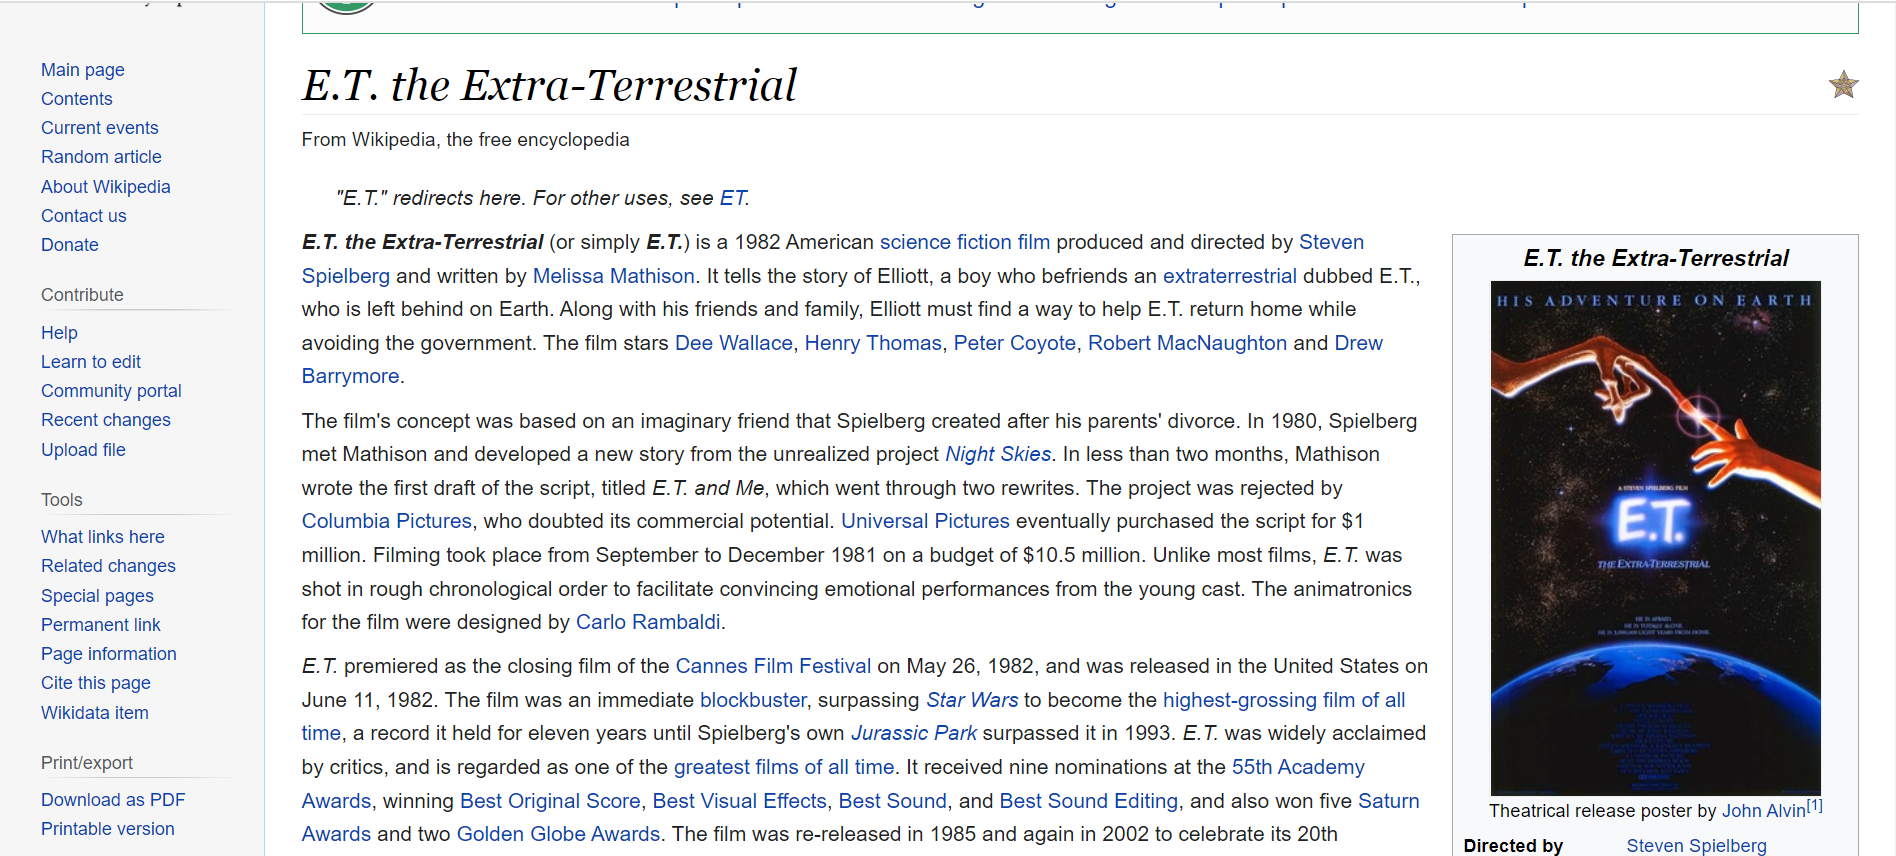

In [36]:
page = wptools.page('E.T._the_Extra-Terrestrial').get()

en.wikipedia.org (query) E.T._the_Extra-Terrestrial
en.wikipedia.org (query) E.T. the Extra-Terrestrial (&plcontinue=...
en.wikipedia.org (parse) 73441
www.wikidata.org (wikidata) Q11621
www.wikidata.org (labels) Q281939|P2638|P4839|P3145|P1015|P3110|Q...
www.wikidata.org (labels) Q11424|Q435696|Q4376972|P3417|P674|P569...
www.wikidata.org (labels) P3808|P5786|P227|P840|P2518|Q461742|P30...
www.wikidata.org (labels) P495|P136|Q723685|Q105776216|P3107|Q457...
www.wikidata.org (labels) P4276|Q981030|Q21571487|Q505449|Q41417|...
www.wikidata.org (labels) Q1270715
en.wikipedia.org (restbase) /page/summary/E.T._the_Extra-Terrestrial
en.wikipedia.org (imageinfo) File:E t the extra terrestrial ver3....
E.T. the Extra-Terrestrial (en) data
{
  WARNINGS: <dict(1)> extracts
  aliases: <list(2)> E.T., ET
  assessments: <dict(4)> United States, Film, Science Fiction, Lib...
  claims: <dict(130)> P1562, P57, P272, P345, P31, P161, P373, P48...
  description: 1982 American science fiction film
  exh

In [37]:
#Let's look at the image attribute, and then access first image(the movie poster) in the images attribute, which is a JSON array.

In [38]:
page.data['image']

[{'kind': 'parse-image',
  'file': 'File:E t the extra terrestrial ver3.jpg',
  'orig': 'E t the extra terrestrial ver3.jpg',
  'timestamp': '2016-06-04T10:30:46Z',
  'size': 83073,
  'width': 253,
  'height': 394,
  'url': 'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg',
  'descriptionurl': 'https://en.wikipedia.org/wiki/File:E_t_the_extra_terrestrial_ver3.jpg',
  'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=7419503',
  'title': 'File:E t the extra terrestrial ver3.jpg',
  'metadata': {'DateTime': {'value': '2016-06-04 10:30:46',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'ObjectName': {'value': 'E t the extra terrestrial ver3',
    'source': 'mediawiki-metadata',
    'hidden': ''},
   'CommonsMetadataExtension': {'value': 1.2,
    'source': 'extension',
    'hidden': ''},
   'Categories': {'value': 'All non-free media|E.T. the Extra-Terrestrial|Fair use images of film posters|Files with no machine-readable autho

In [39]:
page.data['image'][0]

{'kind': 'parse-image',
 'file': 'File:E t the extra terrestrial ver3.jpg',
 'orig': 'E t the extra terrestrial ver3.jpg',
 'timestamp': '2016-06-04T10:30:46Z',
 'size': 83073,
 'width': 253,
 'height': 394,
 'url': 'https://upload.wikimedia.org/wikipedia/en/6/66/E_t_the_extra_terrestrial_ver3.jpg',
 'descriptionurl': 'https://en.wikipedia.org/wiki/File:E_t_the_extra_terrestrial_ver3.jpg',
 'descriptionshorturl': 'https://en.wikipedia.org/w/index.php?curid=7419503',
 'title': 'File:E t the extra terrestrial ver3.jpg',
 'metadata': {'DateTime': {'value': '2016-06-04 10:30:46',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'ObjectName': {'value': 'E t the extra terrestrial ver3',
   'source': 'mediawiki-metadata',
   'hidden': ''},
  'CommonsMetadataExtension': {'value': 1.2,
   'source': 'extension',
   'hidden': ''},
  'Categories': {'value': 'All non-free media|E.T. the Extra-Terrestrial|Fair use images of film posters|Files with no machine-readable author|Noindexed pages|Wik

In [40]:
# Now, let's look at the infobox attributes, and then access the director key of the infobox attribute, which is a JSON object.

In [41]:
page.data['infobox']

{'name': 'E.T. the Extra-Terrestrial',
 'image': 'E t the extra terrestrial ver3.jpg',
 'alt': 'The poster shows the planet earth, a child\'s finger touching E.T\'s finger, with a light blinking on contact. The top headline reads "His Adventure On Earth".',
 'caption': 'Theatrical release poster by [[John Alvin]]',
 'director': '[[Steven Spielberg]]',
 'producers': '{{unbulleted list|[[Kathleen Kennedy (producer)|Kathleen Kennedy]]|[[Steven Spielberg]]}}',
 'writer': '[[Melissa Mathison]]',
 'starring': '{{Plainlist|<!--Per poster billing-->|\n* [[Dee Wallace]]\n* [[Henry Thomas]]\n* [[Peter Coyote]]\n* [[Robert MacNaughton]]\n* [[Drew Barrymore]]}} * [[Dee Wallace]]\n* [[Henry Thomas]]\n* [[Peter Coyote]]\n* [[Robert MacNaughton]]\n* [[Drew Barrymore]]',
 'music': '[[John Williams]]',
 'cinematography': '[[Allen Daviau]]',
 'editing': '[[Carol Littleton]]',
 'studio': '[[Amblin Entertainment]]',
 'distributor': '[[Universal Pictures]]',
 'released': '{{Film date|1982|5|26|[[1982 Canne

In [42]:
page.data['infobox']['director']

'[[Steven Spielberg]]'

In [43]:
page.data['infobox']['producers']

'{{unbulleted list|[[Kathleen Kennedy (producer)|Kathleen Kennedy]]|[[Steven Spielberg]]}}'

In [44]:
page.data['infobox']['studio']

'[[Amblin Entertainment]]'

In [45]:
import requests
from PIL import Image
from io import BytesIO

In [46]:
# List of all of the Wikipedia page titles for each movie in the Rotten Tomatoes Top 100 Movies of All Time list. This list is in the same order as the Top 100.

title_list = [
 'The_Wizard_of_Oz_(1939_film)',
 'Citizen_Kane',
 'The_Third_Man',
 'Get_Out_(film)',
 'Mad_Max:_Fury_Road',
 'The_Cabinet_of_Dr._Caligari',
 'All_About_Eve',
 'Inside_Out_(2015_film)',
 'The_Godfather',
 'Metropolis_(1927_film)',
 'E.T._the_Extra-Terrestrial',
 'Modern_Times_(film)',
 'It_Happened_One_Night',
 "Singin'_in_the_Rain",
 'Boyhood_(film)',
 'Casablanca_(film)',
 'Moonlight_(2016_film)',
 'Psycho_(1960_film)',
 'Laura_(1944_film)',
 'Nosferatu',
 'Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 "A_Hard_Day%27s_Night_(film)",
 'La_Grande_Illusion',
 'North_by_Northwest',
 'The_Battle_of_Algiers',
 'Dunkirk_(2017_film)',
 'The_Maltese_Falcon_(1941_film)',
 'Repulsion_(film)',
 '12_Years_a_Slave_(film)',
 'Gravity_(2013_film)',
 'Sunset_Boulevard_(film)',
 'King_Kong_(1933_film)',
 'Spotlight_(film)',
 'The_Adventures_of_Robin_Hood',
 'Rashomon',
 'Rear_Window',
 'Selma_(film)',
 'Taxi_Driver',
 'Toy_Story_3',
 'Argo_(2012_film)',
 'Toy_Story_2',
 'The_Big_Sick',
 'Bride_of_Frankenstein',
 'Zootopia',
 'M_(1931_film)',
 'Wonder_Woman_(2017_film)',
 'The_Philadelphia_Story_(film)',
 'Alien_(film)',
 'Bicycle_Thieves',
 'Seven_Samurai',
 'The_Treasure_of_the_Sierra_Madre_(film)',
 'Up_(2009_film)',
 '12_Angry_Men_(1957_film)',
 'The_400_Blows',
 'Logan_(film)',
 'All_Quiet_on_the_Western_Front_(1930_film)',
 'Army_of_Shadows',
 'Arrival_(film)',
 'Baby_Driver',
 'A_Streetcar_Named_Desire_(1951_film)',
 'The_Night_of_the_Hunter_(film)',
 'Star_Wars:_The_Force_Awakens',
 'Manchester_by_the_Sea_(film)',
 'Dr._Strangelove',
 'Frankenstein_(1931_film)',
 'Vertigo_(film)',
 'The_Dark_Knight_(film)',
 'Touch_of_Evil',
 'The_Babadook',
 'The_Conformist_(film)',
 'Rebecca_(1940_film)',
 "Rosemary%27s_Baby_(film)",
 'Finding_Nemo',
 'Brooklyn_(film)',
 'The_Wrestler_(2008_film)',
 'The_39_Steps_(1935_film)',
 'L.A._Confidential_(film)',
 'Gone_with_the_Wind_(film)',
 'The_Good,_the_Bad_and_the_Ugly',
 'Skyfall',
 'Rome,_Open_City',
 'Tokyo_Story',
 'Hell_or_High_Water_(film)',
 'Pinocchio_(1940_film)',
 'The_Jungle_Book_(2016_film)',
 'La_La_Land_(film)',
 'Star_Trek_(film)',
 'High_Noon',
 'Apocalypse_Now',
 'On_the_Waterfront',
 'The_Wages_of_Fear',
 'The_Last_Picture_Show',
 'Harry_Potter_and_the_Deathly_Hallows_–_Part_2',
 'The_Grapes_of_Wrath_(film)',
 'Roman_Holiday',
 'Man_on_Wire',
 'Jaws_(film)',
 'Toy_Story',
 'The_Godfather_Part_II',
 'Battleship_Potemkin'
]

In [47]:
folder_name = 'bestofrt_posters'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [48]:
# List of dictionaries to build and convert to a DataFrame later
list_df = []
image_errors = {}
for title in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(title) + 1
        print(ranking)
        page = wptools.page(title, silent=True)
        # Your code here (three lines)
        images = page.get().data['image']
        # First image is usually the poster
        first_image_url = images[0]['url']
        r = requests.get(first_image_url)
        # Download movie poster image
        i = Image.open(BytesIO(r.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + title + '.' + image_file_format)
        # Append to list of dictionaries
        list_df.append({'ranking': int(ranking),
                        'title': title,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + title + ": " + str(e))
        image_errors[str(ranking) + "_" + title] = images

1
1_The_Wizard_of_Oz_(1939_film): cannot identify image file <_io.BytesIO object at 0x000001443FFB6B30>
2
2_Citizen_Kane: cannot identify image file <_io.BytesIO object at 0x0000014440B5DF90>
3
3_The_Third_Man: cannot identify image file <_io.BytesIO object at 0x000001444107D4A0>
4
5
6
6_The_Cabinet_of_Dr._Caligari: cannot identify image file <_io.BytesIO object at 0x000001443FFE1310>
7
7_All_About_Eve: cannot identify image file <_io.BytesIO object at 0x0000014440B4CEA0>
8
9
10
10_Metropolis_(1927_film): cannot identify image file <_io.BytesIO object at 0x0000014440035090>
11
12
12_Modern_Times_(film): cannot identify image file <_io.BytesIO object at 0x000001444104B0E0>
13
14
14_Singin'_in_the_Rain: cannot identify image file <_io.BytesIO object at 0x0000014440450450>
15
15_Boyhood_(film): 'image'
16
17
18
18_Psycho_(1960_film): cannot identify image file <_io.BytesIO object at 0x0000014440B93720>
19
19_Laura_(1944_film): cannot identify image file <_io.BytesIO object at 0x000001443F

API error: {'code': 'invalidtitle', 'info': 'Bad title "A_Hard_Day%27s_Night_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


22_A_Hard_Day%27s_Night_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=A_Hard_Day%2527s_Night_%28film%29
23
23_La_Grande_Illusion: cannot identify image file <_io.BytesIO object at 0x00000144411F8DB0>
24
24_North_by_Northwest: cannot identify image file <_io.BytesIO object at 0x0000014440EEF220>
25
26
27
27_The_Maltese_Falcon_(1941_film): cannot identify image file <_io.BytesIO object at 0x0000014440035F90>
28
29
30
31
31_Sunset_Boulevard_(film): cannot identify image file <_io.BytesIO object at 0x0000014440157EA0>
32
32_King_Kong_(1933_film): cannot identify image file <_io.BytesIO object at 0x0000014440057130>
33
34
34_The_Adventures_of_Robin_Hood: cannot identify image file <_io.BytesIO object at 0x000001443FCA3F90>
35
35_Rashomon: cannot identify image file <_io.BytesIO object at 0x000001444045B3B0>
36
36_Rear_Win

API error: {'code': 'invalidtitle', 'info': 'Bad title "Rosemary%27s_Baby_(film)".', 'docref': 'See https://en.wikipedia.org/w/api.php for API usage. Subscribe to the mediawiki-api-announce mailing list at &lt;https://lists.wikimedia.org/postorius/lists/mediawiki-api-announce.lists.wikimedia.org/&gt; for notice of API deprecations and breaking changes.'}


72_Rosemary%27s_Baby_(film): https://en.wikipedia.org/w/api.php?action=parse&formatversion=2&contentmodel=text&disableeditsection=&disablelimitreport=&disabletoc=&prop=text|iwlinks|parsetree|wikitext|displaytitle|properties&redirects&page=Rosemary%2527s_Baby_%28film%29
73
74
75
76
77
78
78_Gone_with_the_Wind_(film): cannot identify image file <_io.BytesIO object at 0x0000014440454F40>
79
80
81
81_Rome,_Open_City: cannot identify image file <_io.BytesIO object at 0x000001443FCA0CC0>
82
82_Tokyo_Story: cannot identify image file <_io.BytesIO object at 0x00000144411C81D0>
83
84
85
86
87
88
88_High_Noon: cannot identify image file <_io.BytesIO object at 0x000001443FFF8DB0>
89
90
90_On_the_Waterfront: cannot identify image file <_io.BytesIO object at 0x00000144406C8F90>
91
91_The_Wages_of_Fear: cannot identify image file <_io.BytesIO object at 0x0000014440265630>
92
93
94
94_The_Grapes_of_Wrath_(film): cannot identify image file <_io.BytesIO object at 0x000001443FFE1BD0>
95
95_Roman_Holiday

In [63]:
poster_df = pd.DataFrame(list_df, columns = ['ranking', 'title', 'poster_url'])
poster_df = poster_df.sort_values('ranking').reset_index(drop=True)
poster_df

,ranking,title,poster_url
0,1,The_Wizard_of_Oz_(1939_film),https://en.wikipedia.org/wiki/The_Wizard_of_Oz...
1,1,The_Wizard_of_Oz_(1939_film),https://en.wikipedia.org/wiki/The_Wizard_of_Oz...
2,1,The_Wizard_of_Oz_(1939_film),https://en.wikipedia.org/wiki/The_Wizard_of_Oz...
3,4,Get_Out_(film),https://upload.wikimedia.org/wikipedia/en/a/a3...
4,5,Mad_Max:_Fury_Road,https://upload.wikimedia.org/wikipedia/en/6/6e...
5,8,Inside_Out_(2015_film),https://upload.wikimedia.org/wikipedia/en/0/0a...
6,9,The_Godfather,https://upload.wikimedia.org/wikipedia/en/1/1c...
7,11,E.T._the_Extra-Terrestrial,https://upload.wikimedia.org/wikipedia/en/6/66...
8,13,It_Happened_One_Night,https://upload.wikimedia.org/wikipedia/commons...
9,16,Casablanca_(film),https://upload.wikimedia.org/wikipedia/commons...


In [69]:
poster_df.to_csv("movie_poster.csv")